# Plot face grid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from facer import facer
import cv2

Loading face detector and landmark prediction models...
Done, models loaded.


In [2]:
import os

In [ ]:
im = cv2.imread("./one-off/average_faces/average_face_McDonalds.jpg")[..., ::-1]

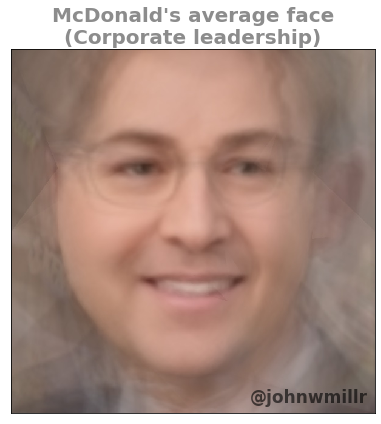

In [32]:
def save_labeled_face_image(company, image):
    # Plot the image
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image)

    # Add a title
    kwargs = {"fontsize": 20, "fontweight": "heavy", "color": "gray", "alpha":0.9}
#     title = f"{company}\ncorporate leadership\n(average face)"
    title = f"{company} average face\n(Corporate leadership)"
    ax.set_title(title, **kwargs)

    # Touch up the image
    ax.set(**{"xlabel": '', "ylabel": '', "xticks": [], "yticks": []})
    plt.tight_layout()
    kwargs = {'fontsize': 17, 'color': 'black', 'weight': 'heavy', 'alpha': 0.6, 'ha': 'right'}
    x, y = image.shape[:2]
    x, y = 0.98 * x, 0.97 * y
    ax.text(x, y, "@johnwmillr", **kwargs)

    # Save the image
    fp = os.path.join("one-off", "average_faces", f"average_face_{company}_labeled.png")
#     fig.savefig(fp, dpi=300)
    plt.show()
    return

save_labeled_face_image("McDonald's", im)

## Load the images

In [3]:
def load_images(root, extensions=["png"], verbose=True):
    """Returns list of image arrays"""
    files = sorted(facer.glob_image_files(root, extensions))
    num_files = len(files)
    if verbose:
        print(f"\nFound {num_files} in '{root}'.")
        N = max(round(0.10 * num_files), 1)

    # Load the images
    images = {}
    for n, file in enumerate(files):
        if verbose and n % N == 0:
            print(f"({n + 1} / {num_files}): {file}")

        image = cv2.imread(file)[..., ::-1]
        image = np.float32(image) / 255.0
        images[file] = image
    return images

In [5]:
path_to_faces = "./subset/"
faces = load_images(path_to_faces, ["jpg"], verbose=False)

## Plot the grid

In [6]:
N = 9
subset = {key:val for key, val in zip(list(faces.keys())[:N], list(faces.items())[:N])}

In [7]:
grab_label = lambda x: x.replace(path_to_faces, "").split("_", 3)[-2:]
sub = list(map(grab_label, list(subset.keys())))
labels = [(rank, company.split(".", 1)[0]) for rank, company in sub]
labels

[('01', 'Walmart'),
 ('02', 'Exxon Mobil'),
 ('03', 'Apple'),
 ('04', 'Berkshire Hathaway'),
 ('05', 'Amazon'),
 ('07', 'McKesson'),
 ('08', 'CVS Health'),
 ('09', 'AT&T'),
 ('10', 'AmerisourceBergen')]

In [ ]:
kwargs = {"figsize": (12, 12), "sharex": True, "sharey": True}
fig, axs = plt.subplots(nrows=3, ncols=3, **kwargs)
keys = list(faces.keys())
n = 0
for row in axs:
    for col in row:
        image = faces[keys[n]]
        col.imshow(image)
        
        kwargs = {"fontsize": 16,  "color": "black", "alpha": 0.7, "weight": "heavy"}
        rank, company = labels[n]
        title = f"(#{rank.lstrip('0')}) {company}"
        col.set_xlabel(title, **kwargs)
        col.set(**{"xticks": [], "yticks": []})
        if n == 2 and col == row[-1]:
            kwargs = {"fontsize": 18, "color": "gray", "alpha": 0.8, "weight": "heavy"}
            col.text(600, -25, "@johnwmillr", **kwargs, ha='right')
        n += 1
plt.tight_layout(pad=0.7)
title = "Average faces of executive leadership of\nthe Top 9 Fortune 500 companies"
kwargs = {"fontsize": 27, "color": "gray", "alpha": 0.9, "weight": "heavy"}
plt.suptitle(title, y=1.06, **kwargs)
fn = title.replace(" ", "_").replace("\n", "_").lower() + ".png"
fig.savefig(fn, dpi=300, bbox_inches="tight")
plt.show()